# **Image Classification of Omnivores and Herbivores using the CIFAR-100 Dataset**

This project aims to classify images into two categories: omnivores and herbivores, utilizing the CIFAR-100 dataset. The CIFAR-100 dataset contains 60,000 32x32 color images in 100 classes, with each class containing 600 images. Here, we focus on distinguishing between animals that primarily consume plants (herbivores) and those that consume both plants and animals (omnivores). Through deep learning techniques and convolutional neural networks (CNNs), we seek to build a model capable of accurate classification among diverse species.


## **Import modules**

In [7]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import matplotlib.pyplot as plt

SyntaxError: invalid syntax (pywrap_tensorflow_internal.py, line 114)

## **Import the dataset**

In [ ]:
(X_coarse_train, y_coarse_train), (X_coarse_test, y_coarse_test) = tf.keras.datasets.cifar100.load_data(
    label_mode='coarse'
)

(X_fine_train, y_fine_train), (X_fine_test, y_fine_test) = tf.keras.datasets.cifar100.load_data(
    label_mode='fine'
)

169001437/169001437 [==============================] - 2s 0us/step


## **Data Preprocessing**
We will be extracting only the `large omnivores and herbivores` coarse class from the dataset along with their fine classes.

In [ ]:
# Extracting images from coarse dataset

coarse_train_index = (y_coarse_train == 11).reshape(X_coarse_train.shape[0]) # Returns the indices where y_coarse_train == 11
X_train = X_coarse_train[coarse_train_index] # Extracts the images from X_train with indices that match the class

coarse_test_index = (y_coarse_test == 11).reshape(X_coarse_test.shape[0])
X_test = X_coarse_test[coarse_test_index]

In [ ]:
# Extracting index of fine labels

labels_of_herbi_omni = []
label_mapping = {}

str_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly',
              'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
              'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
              'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain',
              'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail',
              'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
              'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
herbi_omni = ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo']
print("Fine labels of Herbivores and Omnivores:")
for i, name in enumerate(str_labels):
  if name in herbi_omni:
    print(f"{i}: {name}")
    label_mapping[i] = herbi_omni.index(name)
    labels_of_herbi_omni.append(i)

Fine labels of Herbivores and Omnivores:
15: camel
19: cattle
21: chimpanzee
31: elephant
38: kangaroo


In [ ]:
# Extracting fine labels of images from coarse indices

fine_train_index = np.isin(y_fine_train, labels_of_herbi_omni).reshape(X_fine_train.shape[0])
y_train = y_fine_train[fine_train_index]

fine_test_index = np.isin(y_fine_test, labels_of_herbi_omni).reshape(X_fine_test.shape[0])
y_test = y_fine_test[fine_test_index]

In [ ]:
# Convert fine labels from their original numbers to arbitrary categorical numbers from 0 - 4

y_train = np.array([label_mapping[label[0]] for label in y_train]).reshape(-1, 1)
y_test = np.array([label_mapping[label[0]] for label in y_test]).reshape(-1, 1)

# Convert training and test labels to categorical variables. This does one-hot encoding

y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

In [ ]:
def count_samples():
  # Count samples per class in training set
  train_counts = {label: np.sum(np.argmax(y_train, axis=1) == label) for label in range(y_train.shape[1])}

  # Count samples per class in testing set
  test_counts = {label: np.sum(np.argmax(y_test, axis=1) == label) for label in range(y_test.shape[1])}

  print("\nNumber of samples per class in training set: ")
  for label, count in train_counts.items():
      print(f"{herbi_omni[label]} ({label}): {count}")

  print("\nNumber of samples per class in testing set: ")
  for label, count in test_counts.items():
      print(f"{herbi_omni[label]} ({label}): {count}")


  print(f"\nTotal number of training samples: {sum(train_counts.values())}")
  print(f"Total number of test samples: {sum(test_counts.values())}")

count_samples()


Number of samples per class in training set: 
camel (0): 500
cattle (1): 500
chimpanzee (2): 500
elephant (3): 500
kangaroo (4): 500

Number of samples per class in testing set: 
camel (0): 100
cattle (1): 100
chimpanzee (2): 100
elephant (3): 100
kangaroo (4): 100

Total number of training samples: 2500
Total number of test samples: 500


In [ ]:
# Normalize the pixels of the images from 0 to 1

X_train = X_train / 255
X_test = X_test / 255

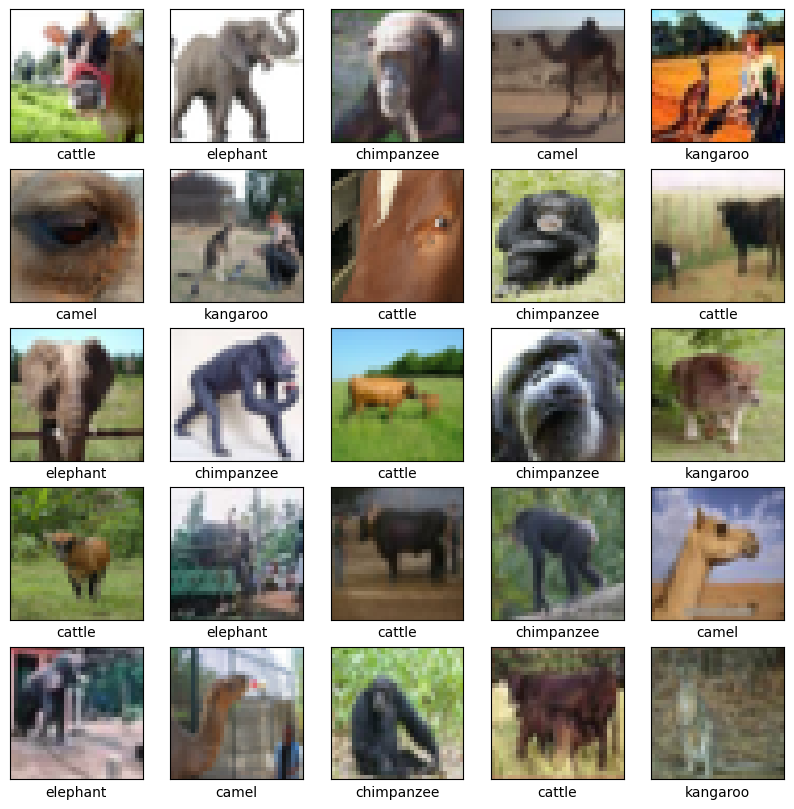

In [ ]:
# Display 25 sample images with labels
def view_samples():
  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(X_train[i], cmap=plt.cm.binary)
      plt.xlabel(herbi_omni[np.argmax(y_train[i])])
  plt.show()

view_samples()

## **Data Augmentation**
The dataset is too small for accurate image processing. According to Picsellia (2022), for a dataset to be adequate in size for image classification, around 1000 images per class is needed.

In [ ]:
data_augmentation_pipeline = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.3),
  tf.keras.layers.RandomContrast(0.3)
])

# Define the number of times to augment each image
num_augmentations = 2

# Initialize lists to store augmented images and labels
augmented_training_set = []
augmented_labels = []

# Apply data augmentation to each image multiple times
for image, label in zip(X_train, y_train):
    for _ in range(num_augmentations):
        augmented_image = data_augmentation_pipeline(image)  # Apply data augmentation
        augmented_training_set.append(augmented_image)
        augmented_labels.append(label)

augmented_training_set = np.array(augmented_training_set)
augmented_labels = np.array(augmented_labels)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Define the file path to save the model
filepath = 'highest_performing_model.h5'

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Define the model architecture
model = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, validation_split=0.1, validation_data=(X_test[:1500], y_test[:1500]), callbacks=[checkpoint])
model.load_weights(filepath)

In [ ]:
augmented_training_set.shape

(5000, 32, 32, 3)

There are 5000 new images generated from the augmented training set. Below are some examples of the augmentations done.

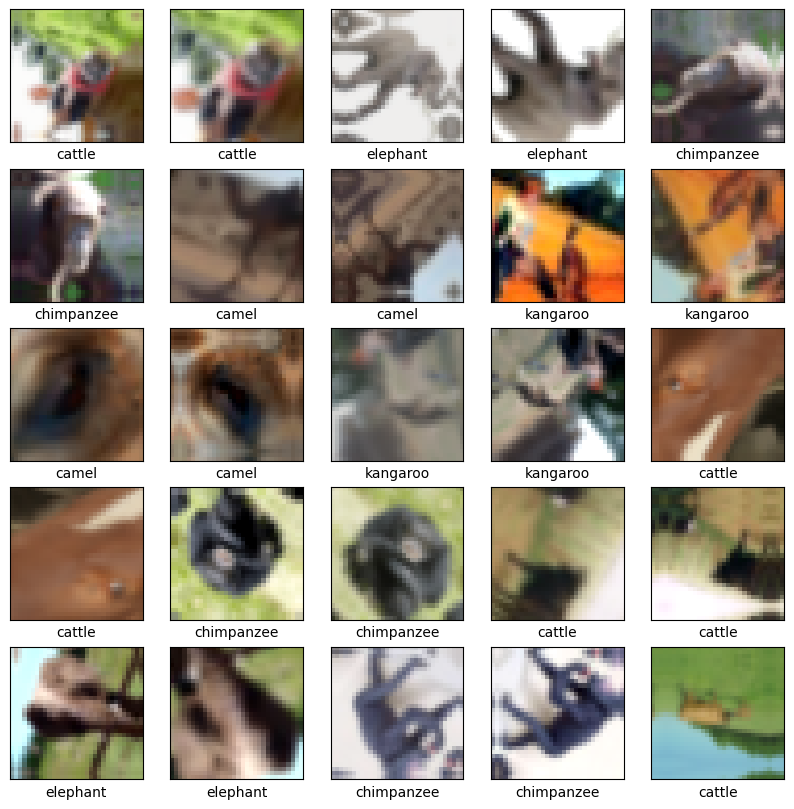

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augmented_training_set[i], cmap=plt.cm.binary)
    plt.xlabel(herbi_omni[np.argmax(augmented_labels[i])])
plt.show()

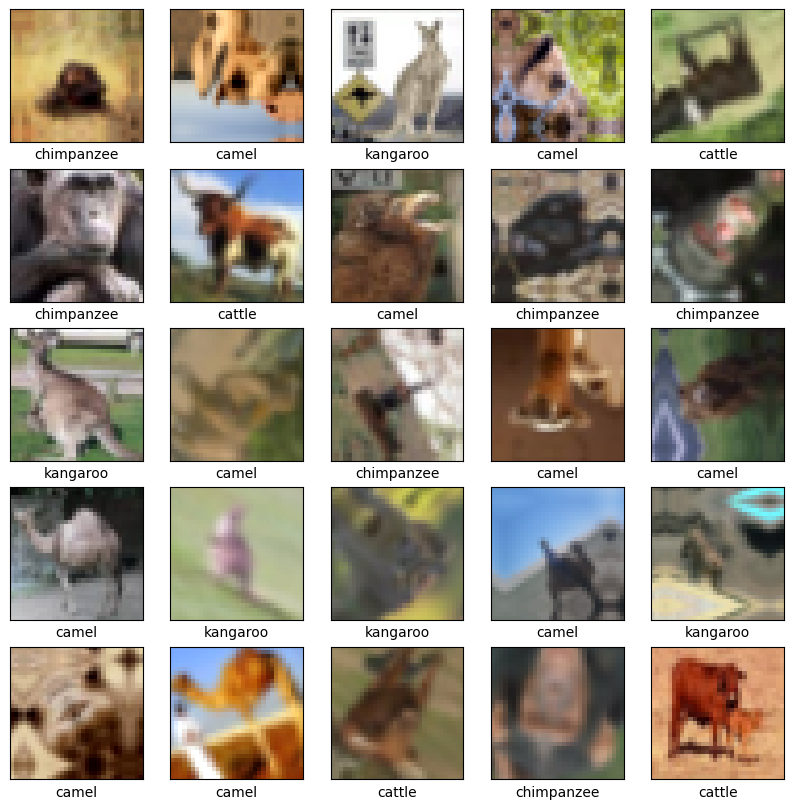

In [ ]:
# Merge original and augmented dataset, and shuffle to ensure randomness
X_train = np.concatenate((X_train, augmented_training_set), axis=0)
y_train = np.concatenate((y_train, augmented_labels), axis=0)

# Shuffle the merged dataset to maintain randomness
shuffle_indices = np.random.permutation(len(X_train))
X_train = X_train[shuffle_indices]
y_train = y_train[shuffle_indices]

view_samples()

In [ ]:
# Count samples again to see how much the dataset increased by

count_samples()


Number of samples per class in training set: 
camel (0): 1500
cattle (1): 1500
chimpanzee (2): 1500
elephant (3): 1500
kangaroo (4): 1500

Number of samples per class in testing set: 
camel (0): 100
cattle (1): 100
chimpanzee (2): 100
elephant (3): 100
kangaroo (4): 100

Total number of training samples: 7500
Total number of test samples: 500


We have now satisfied the minimum 1000 as cited earlier. We can now attempt training.

## **Model Training**
The neural network to be created is a Convolutional Neural Network (CNN). We will be making use of 3 layers of Convolution with Dropout layers in between. There will also be Batch Normalization layers in order to ensure that no weight during gradient descent will be far greater or lesser than others. This also speeds up the model.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Define the file path to save the model
filepath = 'highest_performing_model.h5'

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Define the model architecture
model = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, validation_split=0.1, validation_data=(X_test[:1500], y_test[:1500]), callbacks=[checkpoint])
model.load_weights(filepath)

Epoch 1/100
235/235 [==============================] - ETA: 0s - loss: 1.6765 - accuracy: 0.3511
Epoch 1: val_accuracy improved from -inf to 0.25200, saving model to highest_performing_model.h5
235/235 [==============================] - 63s 255ms/step - loss: 1.6765 - accuracy: 0.3511 - val_loss: 2.1632 - val_accuracy: 0.2520
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


235/235 [==============================] - ETA: 0s - loss: 1.4161 - accuracy: 0.4099
Epoch 2: val_accuracy improved from 0.25200 to 0.36800, saving model to highest_performing_model.h5
235/235 [==============================] - 56s 239ms/step - loss: 1.4161 - accuracy: 0.4099 - val_loss: 1.5572 - val_accuracy: 0.3680
Epoch 3/100
235/235 [==============================] - ETA: 0s - loss: 1.3637 - accuracy: 0.4368
Epoch 3: val_accuracy improved from 0.36800 to 0.49400, saving model to highest_performing_model.h5
235/235 [==============================] - 59s 250ms/step - loss: 1.3637 - accuracy: 0.4368 - val_loss: 1.2859 - val_accuracy: 0.4940
Epoch 4/100
235/235 [==============================] - ETA: 0s - loss: 1.3045 - accuracy: 0.4637
Epoch 4: val_accuracy improved from 0.49400 to 0.50600, saving model to highest_performing_model.h5
235/235 [==============================] - 60s 254ms/step - loss: 1.3045 - accuracy: 0.4637 - val_loss: 1.1831 - val_accuracy: 0.5060
Epoch 5/100
235/235

In [ ]:
# TESTING SCRIPT TO LOAD 10 RANDOM CHOSEN IMAGES FROM THE DATA SET (THIS IS FROM THE DATASET ABOVE)....
import random
no_of_tests = 10

random_indices = random.sample(range(len(X_test)), no_of_tests)
correct_count = 0

for index in random_indices:
    image = X_test[index]
    true_label = y_test[index][0]

    image = image.reshape(1, 32, 32, 3)
    predicted_label = np.argmax(cnn.predict(image))
    print(f"True Label: {herbi_omni[true_label]}, Predicted Label: {herbi_omni[predicted_label]}")
    if true_label == predicted_label:
        correct_count += 1

# Showing the percentage of what was predicted correct
percentage_correct = (correct_count / len(random_indices)) * 100
print(f"Percentage Correct: {percentage_correct}%")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report:\n", classification_report(y_test, y_pred_classes))